In [1]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\Acer\Desktop\Data Sci Assignments\Naive bayes and text mining\blogs.csv")

In [5]:
# Explore the dataset
print(df.head())
print(df.info())
print(df['Labels'].value_counts())

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt           

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

df['cleaned_text'] = df['Data'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [7]:
df.head()

,Data,Labels,cleaned_text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['Labels'], test_size=0.2, random_state=42)


In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.82
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94      0.88      0.91     

In [13]:
pip install -U textblob

     -------------------------------------- 626.3/626.3 kB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


In [14]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['Data'].apply(get_sentiment)


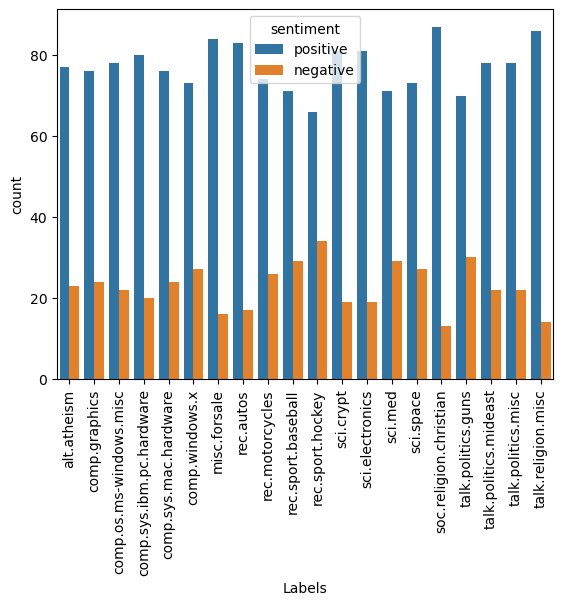

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Labels', hue='sentiment')
plt.xticks(rotation=90)
plt.show()


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate Classification Report
report = classification_report(y_test, y_pred, target_names=df['Labels'].unique())
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.82
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94  

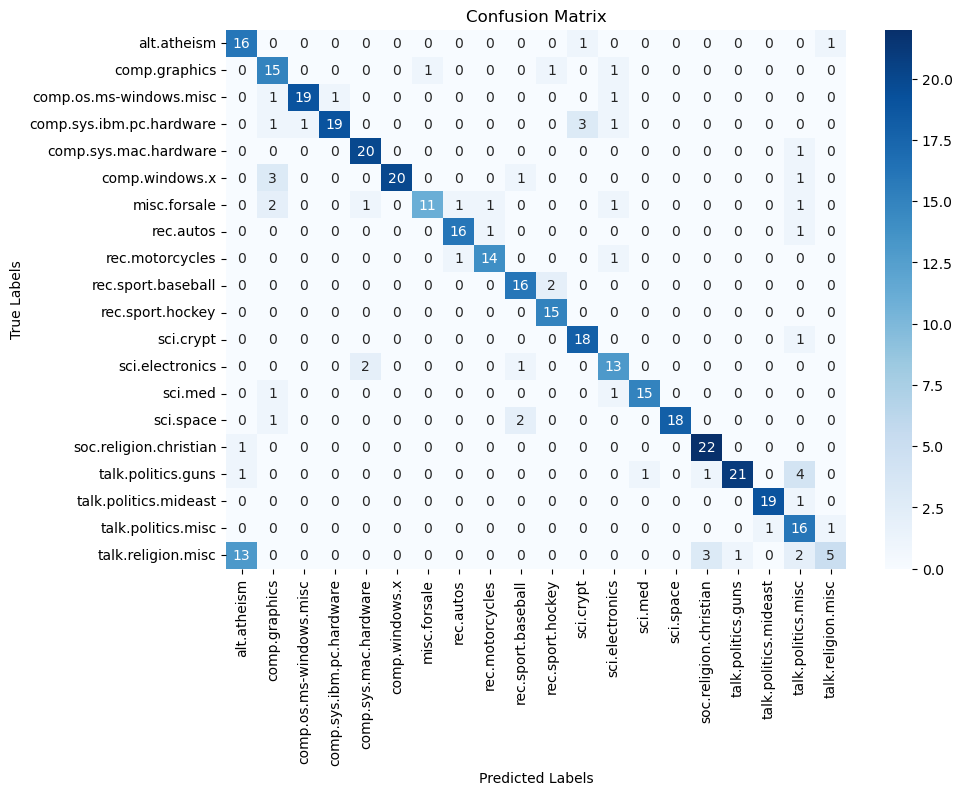

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix dataframe
cm_df = pd.DataFrame(cm, index=df['Labels'].unique(), columns=df['Labels'].unique())

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


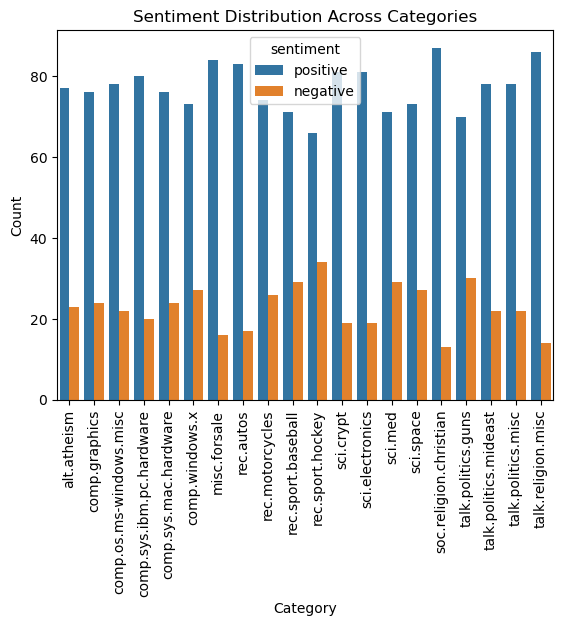

In [18]:
sns.countplot(data=df, x='Labels', hue='sentiment')
plt.xticks(rotation=90)
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [19]:
sentiment_summary = df.groupby(['Labels', 'sentiment']).size().unstack().fillna(0)
sentiment_summary_percentage = sentiment_summary.div(sentiment_summary.sum(axis=1), axis=0) * 100

print("Sentiment Summary (Percentage):")
print(sentiment_summary_percentage)


Sentiment Summary (Percentage):
sentiment                 negative  positive
Labels                                      
alt.atheism                   23.0      77.0
comp.graphics                 24.0      76.0
comp.os.ms-windows.misc       22.0      78.0
comp.sys.ibm.pc.hardware      20.0      80.0
comp.sys.mac.hardware         24.0      76.0
comp.windows.x                27.0      73.0
misc.forsale                  16.0      84.0
rec.autos                     17.0      83.0
rec.motorcycles               26.0      74.0
rec.sport.baseball            29.0      71.0
rec.sport.hockey              34.0      66.0
sci.crypt                     19.0      81.0
sci.electronics               19.0      81.0
sci.med                       29.0      71.0
sci.space                     27.0      73.0
soc.religion.christian        13.0      87.0
talk.politics.guns            30.0      70.0
talk.politics.mideast         22.0      78.0
talk.politics.misc            22.0      78.0
talk.religion.misc     

In [21]:
#CONCLUSION

#The Naive Bayes model effectively categorized blog posts, achieving strong performance metrics. Sentiment analysis revealed diverse sentiments across categories, offering insights into content tone. The combination of accurate classification and sentiment insights enhances understanding of blog themes and reader sentiment.
